# Particle ID parametrization

This notebook will do *one* parametrization of the particle ID and nothing else. Please use it more as a script and less as a notebook - no trying this and that out!

In [5]:
%matplotlib inline
# imports
from scipy.optimize import curve_fit
from scipy.stats import norm

from pisa.utils.utils import get_bin_centers

Load the PID file

In [6]:
pid_file = '/Users/timothyarlen/icecube/pisa_nmh_related/pisa_analysis/inputs/pid/V36/pid_vs_reco_egy/PIDtable_PINGUV36_RecoEnergy_FractionIDasTrack_HE_BDTG_0.15.txt'
#energy, nue, nue_sigma, numu, numu_sigma, nutau, nutau_sigma, NC, NC_sigma = loadtxt(pid_file, skiprows=1).T
energy, nue, nue_sigma, numu, numu_sigma, nutau, nutau_sigma, NC, NC_sigma = np.loadtxt(pid_file).T
ebins = np.concatenate((energy,[80]),axis=0)

print("ebins: ",ebins)
ecen = get_bin_centers(ebins)
print("ecen: ",ecen)


ID_as = 'trck'

data_dict = {
             'nue':  {  'label': r'$\nu_e$',
                        'ID':    nue,
                        'sigma': nue_sigma},
             'numu': {  'label': r'$\nu_\mu$',
                        'ID':    numu,
                        'sigma': numu_sigma},
             'nutau':{  'label': r'$\nu_\tau$',
                        'ID':    nutau,
                        'sigma': nutau_sigma},
             'NC':   {  'label': r'$NC$',
                        'ID':    NC,
                        'sigma': NC_sigma}
            }

('ebins: ', array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.]))
('ecen: ', array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.]))


Make one plot of all flavours

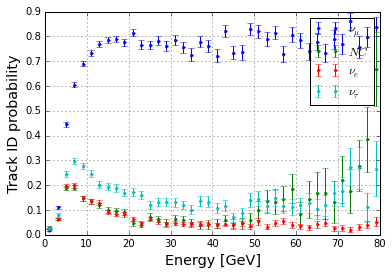

In [10]:
for flavour in data_dict.itervalues():
    plt.errorbar(ecen, flavour['ID'], yerr=flavour['sigma'], fmt='.', label=flavour['label'])
    
plt.legend(loc='upper right')
plt.grid()

plt.xlabel('Energy [GeV]', size='x-large')
plt.ylabel('Track ID probability', size='x-large')

Define all functions that will be used for fits

In [36]:
# Fermi-Dirac-like step
FD_step = lambda E, level, step, width, offset: level/(np.exp((step - np.log10(E))/width) + 1.) + offset
FD_p0 = [0.5, 0.8, 0.2, 0.01]
FD_step_str = '%.2e/(np.exp((%.2e - np.log10(E))/%.2e) + 1.) + %.2e'

# generic exponential
exp_func = lambda E, scale, timeconst, offset: scale*np.exp(-E/timeconst) + offset
exp_p0 = [0.5, 10., 0.1]
exp_str = '%.2e*np.exp(-E/%.2e) + %.2e'

# gaussian (for the slope)
gauss_func = lambda E, scale, pos, width, offset: scale*norm(loc=pos, scale=width).pdf(E) + offset
gauss_p0 = [1., 10., 5., 0.02]
gauss_str = '%.2e*scipy.stats.norm(loc=%.2e, scale=%.2e).pdf(E) + %.2e'

# gaussian in log(E)
gauss_log_func = lambda E, scale, pos, width, offset: scale*norm(loc=pos, scale=width).pdf(np.log10(E)) + offset
gauss_log_p0 = [1., 10., 5., 0.02]
gauss_log_str = '%.2e*scipy.stats.norm(loc=%.2e, scale=%.2e).pdf(np.log10(E)) + %.2e'

# gaussian in log(E)
gauss_log_func = lambda E, scale, pos, width, offset: scale*norm(loc=pos, scale=width).pdf(np.log10(E)) + offset
gauss_log_p0 = [1., 5., 5., 0.02]
gauss_log_str = '%.2e*scipy.stats.norm(loc=%.2e, scale=%.2e).pdf(np.log10(E)) + %.2e'


key: numu, fit: [ 0.763766    0.68842292  0.11431732  0.01604084]
key: NC, fit: [ 0.08807611  0.8531685   0.22452428  0.0352123 ]
key: nue, fit: [ 0.08823305  0.85028855  0.22303158  0.03751018]
key: nutau, fit: [ 0.14393807  0.95843125  0.28254714  0.06998867]

{'numu': {'trck': 'lambda E: 7.64e-01/(np.exp((6.88e-01 - np.log10(E))/1.14e-01) + 1.) + 1.60e-02', 'cscd': 'lambda E: 1. - (7.64e-01/(np.exp((6.88e-01 - np.log10(E))/1.14e-01) + 1.) + 1.60e-02)'}, 'NC': {'trck': 'lambda E: 8.81e-02*scipy.stats.norm(loc=8.53e-01, scale=2.25e-01).pdf(np.log10(E)) + 3.52e-02', 'cscd': 'lambda E: 1. - (8.81e-02*scipy.stats.norm(loc=8.53e-01, scale=2.25e-01).pdf(np.log10(E)) + 3.52e-02)'}, 'nue': {'trck': 'lambda E: 8.82e-02*scipy.stats.norm(loc=8.50e-01, scale=2.23e-01).pdf(np.log10(E)) + 3.75e-02', 'cscd': 'lambda E: 1. - (8.82e-02*scipy.stats.norm(loc=8.50e-01, scale=2.23e-01).pdf(np.log10(E)) + 3.75e-02)'}, 'nutau': {'trck': 'lambda E: 1.44e-01*scipy.stats.norm(loc=9.58e-01, scale=2.83e-01).pdf

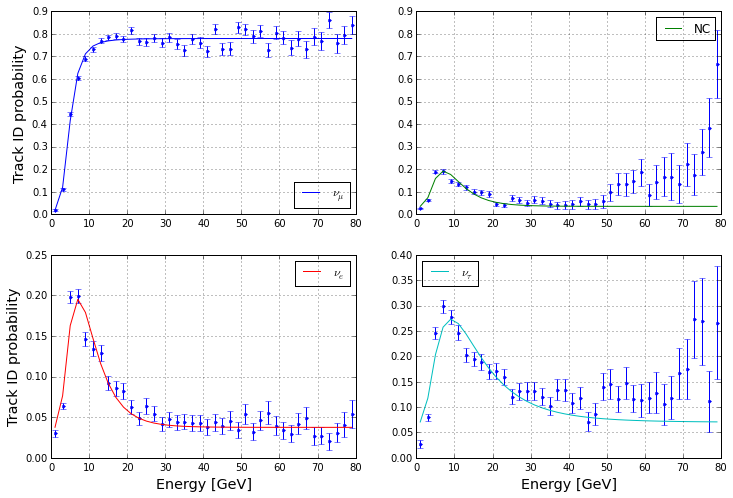

In [40]:
func = gauss_log_func
func_str = gauss_log_str
first_guess = gauss_log_p0

param_dict = {}

plt.figure(figsize=(12,8))
colors = ['b','g','r','c']
flavors = [r'$\nu_\mu$','NC',r'$\nu_e$',r'$\nu_\tau$']
for i, (key, val) in enumerate(data_dict.items()):
    
    plt.subplot(2, 2, 1+i)
    
    #title(val['label'], size='xx-large')
    plt.errorbar(ecen, val['ID'], yerr=val['sigma'], fmt='.')
    
    plt.grid()
    plt.xlim(0,80)
    plt.ylim(ymin=0)
    if i>1:
        plt.xlabel('Energy [GeV]', size='x-large')
    if not i%2:
        plt.ylabel('%s ID probability'%('Track' if ID_as=='trck' else 'Cascade'), size='x-large')
    
    try:
        
        ############### TCA Addition ##################
        if(key in ['numu']):
            func = FD_step
            func_str = FD_step_str
            first_guess = FD_p0
        elif (key in ['nu']):
            func = exp_func
            func_str = exp_str
            first_guess = exp_p0
        elif (key in ['nu']):
            func = gauss_func
            func_str = gauss_str
            first_guess = gauss_p0
        else:
            func = gauss_log_func
            func_str = gauss_log_str
            first_guess = gauss_log_p0
        #####################################################
                
        fit, cov = curve_fit(func, ecen, val['ID'], sigma=val['sigma'], p0=first_guess)
        plt.plot(ecen, func(ecen, *fit), '-'+colors[i],label=flavors[i])

        plt.legend(loc='best')
        #grid()
        
        print "key: %s, fit: %s"%(key,fit)
        
        stringrepr = func_str%tuple(fit)
        param_dict[key] = {ID_as: 'lambda E: '+stringrepr,
                           ('cscd' if ID_as=='trck' else 'trck'): 'lambda E: 1. - (%s)'%stringrepr}
    except RuntimeError:
        pass

#legend(loc='best')
#grid()
#xlim(0,50)
print "\n",param_dict
#savefig(save_dir+'PID_V15.png',dpi=150)

# new PID: 1.872/1.990 -> 1.82/1.99
# old/wrong PID: 1.903/2.003